In [2]:
実践13-1 K-Meansクラスタリングによる品種の分類
irisデータセットをロードする
説明変数(4つの特徴量)を抽出する
K-Means法によりクラスタリングを行う
(応用: 可能ならば)エルボー法で最適なクラスタ数を決定する
(可能ならば)クラスタリング結果と実際の品種ラベルを比較し、正解率を計算する(教師なし学習なので通常は実施しないが、参考のために実施する)

SyntaxError: invalid character '、' (U+3001) (ipython-input-2-2788639854.py, line 6)

In [9]:
# irisデータセットをロードする
import pandas as pd
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)['frame']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# 説明変数(4つの特徴量)を抽出する
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# K-Means法によりクラスタリングを行う
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [13]:
X_scaled = scaler.transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

In [14]:
from sklearn.cluster import KMeans

In [69]:
model = KMeans(n_clusters=3, random_state=0)

In [70]:
model.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [71]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [72]:
df['クラスター'] = model.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,クラスター,正解ラベル
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0


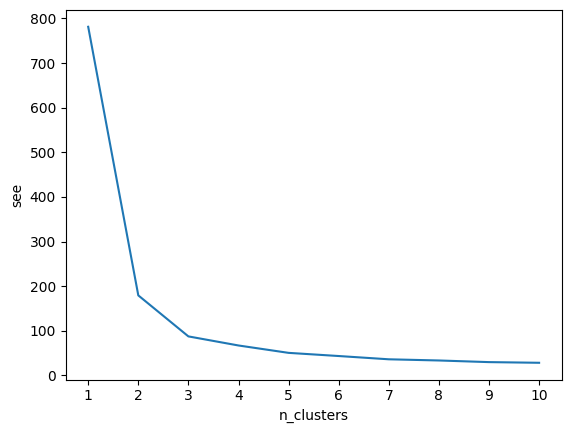

In [73]:
import matplotlib.pyplot as plt
SSE = [] #seeを入れる空リストを作成

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0) # k平均法のモデルを定義
  kmeans.fit(X) #k平均法の実行
  SSE.append(kmeans.inertia_) # SSEにsseを加える

plt.plot(range(1, 11), SSE) # 横軸グループ数、縦軸sseの折れ線グラフを作成

plt.xlabel('n_clusters') # x軸のラベルをn_clustersに設定
plt.ylabel('see') # y軸のラベルをseeに設定
plt.xticks(range(1, 11, 1)) # x軸のメモリを設定

plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

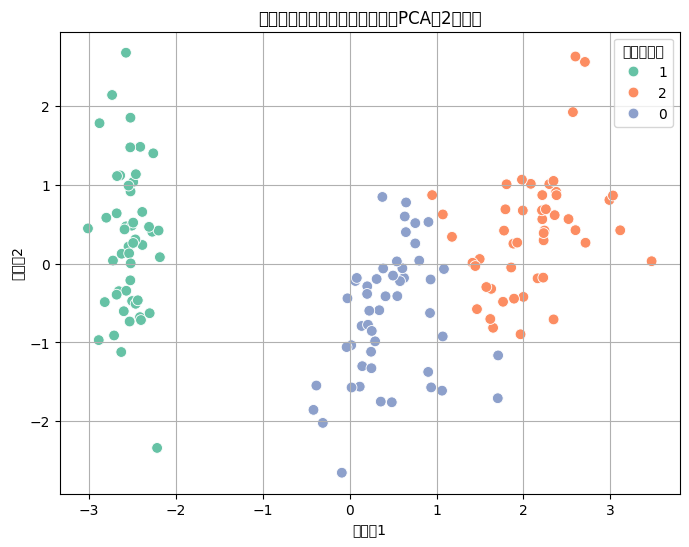

In [74]:
# 散文図でクラスを可視化する
from sklearn.decomposition import PCA

# PCAで2次元に次元削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCAの結果をDataFrameに変換
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['クラスター'] = df['クラスター'].astype(str)  # クラスターラベルを文字列にして色分け用に

# 散布図を描画
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='クラスター', palette='Set2', s=60)
plt.title('クラスタリング結果の散布図（PCAで2次元）')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.legend(title='クラスター')
plt.grid(True)
plt.show()

In [61]:
# 本来のラベル（irisの品種）を取得
true_labels = load_iris()['target']
df['正解ラベル'] = true_labels

# クラスタリング結果と正解ラベルのクロス集計
ct = pd.crosstab(df['クラスター'], df['正解ラベル'],
                 rownames=['クラスタ'], colnames=['正解ラベル'])

print("クラスタ vs 正解ラベル（クロス集計）")
print(ct)

クラスタ vs 正解ラベル（クロス集計）
正解ラベル   0   1   2
クラスタ             
0       0  47   3
1      50   0   0
2       0   3  47


In [ ]:
クラスタリング結果と実際の品種ラベルを比較し、正解率を計算する(教師なし学習なので通常は実施しないが、参考のために実施する)